# TRENDS IN AFRICA'S FOOD PRODUCTION AND SUPPLY(2004-2013)

**Welcome to Data Storytelling with Kila. We will be discussing the Africa's food production and supply dataset between 2004 and 2013. We are going to discuss, amongst other discussions, the following points:** 
- **Trends in food production and supply over the years.**
- **Average and median food production, outliers and ranges.**
- **Comparison between average food supply and production for each year.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= 'darkgrid')
plt.rc('figure', figsize=(15,10))
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load production and supply datasets
supply_df = pd.read_csv('Africa Food Supply (2004 - 2013).csv')
production_df = pd.read_csv('Africa Food Production (2004 - 2013).csv')

In [ ]:
production_df.groupby('Item')['Value'].sum().to_frame().reset_index().max()

In [ ]:
#load population dataset
population_data = pd.read_excel('population data.xlsx')
population_data.head(3)

In [ ]:
df_pop = population_data[['Country Name','Country Code','2004.1','2005.1',
                   '2006.1','2007.1','2008.1','2009.1','2010.1','2011.1','2012.1','2013.1']]
df_pop.head(3)

In [ ]:
column_name= {'Country Name':'Country','Country Code':'CODE', 
              '2004.1':'2004','2005.1':'2005', '2006.1':'2006',
              '2007.1':'2007', '2008.1':'2008', '2009.1':'2009', 
              '2010.1':'2010', '2011.1':'2011','2012.1':'2012', 
              '2013.1':'2013'}

df_pop = df_pop.rename(columns = column_name)

df_population=pd.melt(df_pop, id_vars = ('Country','CODE'), var_name = 'Year', value_name='Population')
pop = df_population.drop('Country', axis =1)
pop.head()

In [ ]:
pop.dtypes

In [8]:
#convert "Year" to int
pop['Year']= pop['Year'].astype(int)

In [ ]:
country_code = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

country_code.at[73,'COUNTRY']= 'Gambia'
country_code.at[46,'COUNTRY']= 'Congo'
country_code.at[197,'COUNTRY']= 'United Republic of Tanzania'

assign_code = country_code.drop('GDP (BILLIONS)', axis=1)

new_name ={'COUNTRY':'Country'}
assign_code = assign_code.rename(columns = new_name)
assign_code.head()

## EXPLORING THE FOOD PRODUCTION DATA


In [ ]:
production_df.head()

In [ ]:
production_df= pd.merge(production_df, assign_code, on='Country')
production_df.head()

In [ ]:
#check for empty values
production_df.isnull().sum()

In [ ]:
production_df.shape

In [ ]:
production_df.info()

**Before we delve into the exploratory analysis of the food production dataset, let us look at some basic facts.**

In [15]:
print(f"There are {len(production_df['Country'].unique())} countries in the data")

There are 45 countries in the data


In [16]:
print(f"{len(production_df['Item'].unique())} different food items were produced across the 45 countries between 2004 and 2013")

94 different food items were produced across the 45 countries between 2004 and 2013


Yam has the highest output with over 1 million kilontons produced, while Alcohol is the least produced food item.

#### TRENDS IN FOOD PRODUCTION

In [17]:
#compute total food produced each year
total_production = production_df.groupby('Year')['Value'].sum().to_frame().reset_index()
total_production

Year   Value
0  2004  663006
1  2005  691257
2  2006  718602
3  2007  705659
4  2008  736804
5  2009  746870
6  2010  786466
7  2011  812214
8  2012  841667
9  2013  872571

**The table above shows that there has been a steady increase in food production over the 10 year period.**


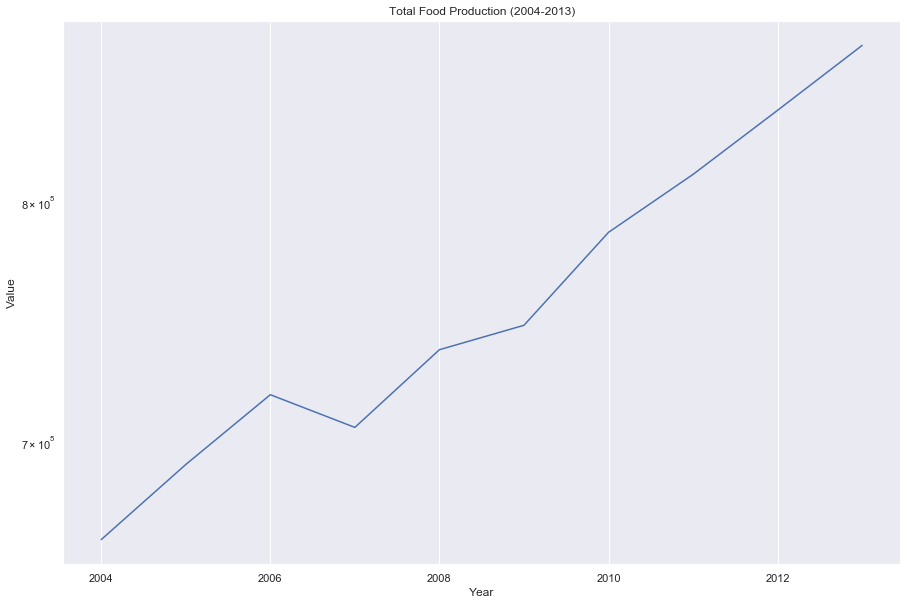

In [18]:
#Initialize line plot 
lineplot = sns.lineplot(x='Year', y= 'Value', data = total_production)
lineplot.set_title('Total Food Production (2004-2013)')
lineplot.set_yscale('log')

**From the plot, aside from 2007, there has been and upward trend in total food production. The world actually suffered a major drop food in production between 2007 and 2008, and Africa was not left out.**

____________________________________________________________________________________________________

**What is the volume of food produced by each country?**
**Let us look at the trends below.**

In [ ]:
#Calculate total amout of food produced by each country yearly
total_prod_per_country = production_df.groupby(['Year','Country','CODE'])['Value'].sum().to_frame().reset_index()
total_prod_per_country.sample(6)

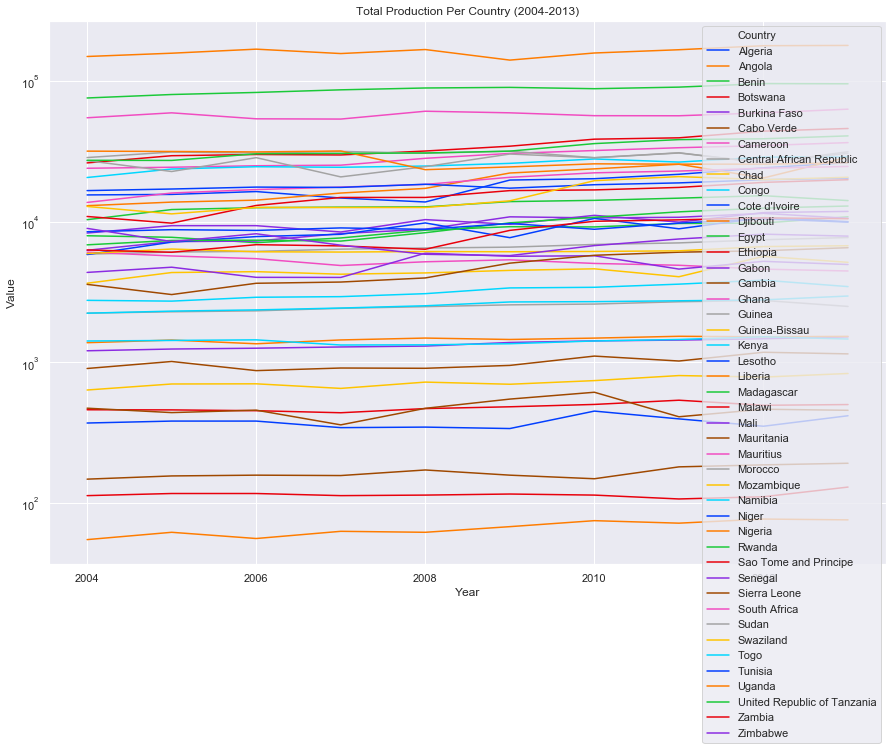

In [20]:
line_plot= sns.lineplot(x = 'Year', y = 'Value', hue = 'Country', 
                        palette = 'bright', ci = None, data = total_prod_per_country)
line_plot.set_title('Total Production Per Country (2004-2013)')
line_plot.set_yscale('log')

**To better put this in perspective, let us see the total production per country on a map.**

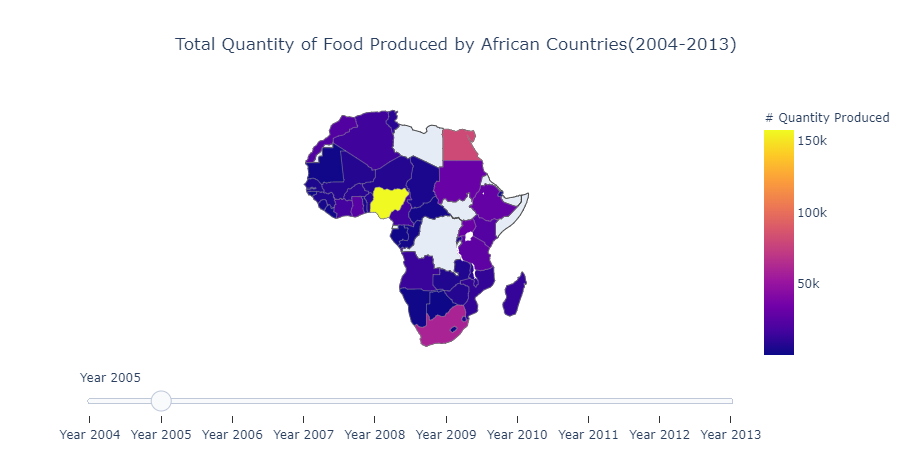

In [21]:
data_slider = []
for year in total_prod_per_country['Year'].unique():
    df_segmented = total_prod_per_country[(total_prod_per_country['Year']== year)]

    for col in df_segmented.columns:
        df_segmented[col] = df_segmented[col]

    data_each_yr = dict(type='choropleth',
                        locations = df_segmented['CODE'],
                        z=df_segmented['Value'],
                        locationmode='ISO-3',
                        text = df_segmented['Country'],
    marker_line_color='darkgray',
    marker_line_width=0.3,
                        colorbar= {'title':'# Quantity Produced'})

    data_slider.append(data_each_yr)

steps = []
for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label='Year {}'.format(i + 2004))
    step['args'][1][i] = True
    steps.append(step)

sliders = [dict(active=0, pad={"t": 1}, steps=steps)]

layout = dict(title ='Total Quantity of Food Produced by African Countries(2004-2013)',
              title_x=0.5,
              geo=dict(scope='africa',
              projection={'type': 'equirectangular'}),
              sliders=sliders)

fig = dict(data=data_slider, layout=layout)
figi = go.Figure(fig)
figi.show()


**The map clearly shows the amount of food produced by each countries. It reveals South Africa, Egypt and Nigeria as the top 3 food producing countries.**

In [22]:
top_producers = production_df.groupby('Country')['Value'].sum().to_frame().reset_index()
top_20_producers = top_producers.sort_values('Value', ascending= False).iloc[:20] 

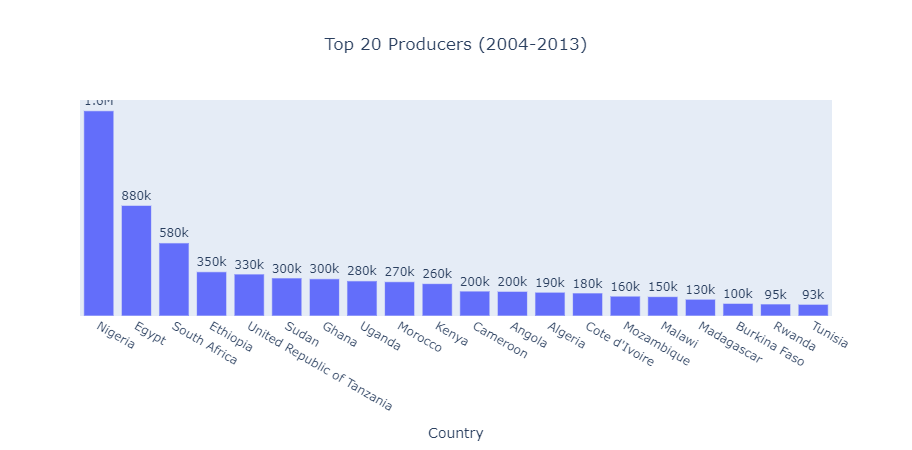

In [23]:
fig = px.bar(top_20_producers, y='Value', x='Country',title='Top 20 Producers (2004-2013)',text='Value')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',title_x=0.5)
fig.update_yaxes(visible=False, showticklabels=False)

fig.show()

#### FOOD PRODUCTION: MEDIAN, RANGES AND OUTLIERS.


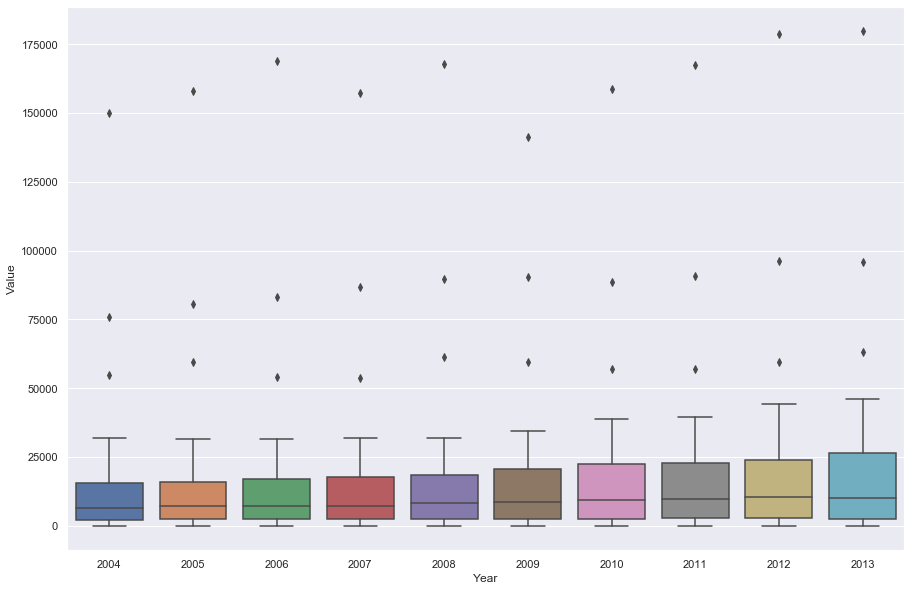

In [24]:
#Intialize boxplot
sns.boxplot(x='Year', y='Value', data= total_prod_per_country)


**The average production has steadily increased over the years. Production level is generally right skewed, an indication that the production levels of countries below 50th percentile are closer together than the production levels of countries above the median. As the years go by, the disparity among countries production level continued to grow, as evident in the steady increase in box size.**

**The countires with the oulier values are giving below**

In [25]:
outliers = total_prod_per_country[total_prod_per_country['Value']>50000]
outliers

Year       Country CODE   Value
12   2004         Egypt  EGY   75989
31   2004       Nigeria  NGA  149857
36   2004  South Africa  ZAF   54949
57   2005         Egypt  EGY   80422
76   2005       Nigeria  NGA  158149
81   2005  South Africa  ZAF   59577
102  2006         Egypt  EGY   83191
121  2006       Nigeria  NGA  168987
126  2006  South Africa  ZAF   54024
147  2007         Egypt  EGY   86828
166  2007       Nigeria  NGA  157273
171  2007  South Africa  ZAF   53795
192  2008         Egypt  EGY   89489
211  2008       Nigeria  NGA  167935
216  2008  South Africa  ZAF   61162
237  2009         Egypt  EGY   90375
256  2009       Nigeria  NGA  141270
261  2009  South Africa  ZAF   59590
282  2010         Egypt  EGY   88450
301  2010       Nigeria  NGA  158709
306  2010  South Africa  ZAF   56863
327  2011         Egypt  EGY   90767
346  2011       Nigeria  NGA  167403
351  2011  South Africa  ZAF   56788
372  2012         Egypt  EGY   96139
391  2012       Nigeria  NGA  178816
396  2012  South Africa  ZAF   59581
417  2013         Egypt  EGY   95848
436  2013       Nigeria  NGA  179631
441  2013  South Africa  ZAF   63263

In [ ]:
outlier_percentage = ((outliers['Value'].sum())/(total_production['Value'].sum()))*100
outlier_percentage

**Nigeria, Egypt and South Africa, as far as food production is concerned, are in a league of thier own. Not only have they consistently out-produced all other countries, they have done it with a very high margin. They are responsible for 40.7 percent of the total food prodcution between 2004 and 2013.**

**Following this trend, we expect food supply for these countries to be equally higher than others, right? Of course, this is the expected trend. But before we figure this out with the food supply dataset, let us see how food production has fared with increasing population.**

______________________________________________________________________________________________________________________________

### PRODUCTION VS POPULATION

In [ ]:
#merge production data with population data
prod_pop_data = pd.merge(total_prod_per_country, pop, on=('CODE','Year'))
prod_pop_data.head()

In [ ]:
len(prod_pop_data)

In [ ]:
#calculate mean production and mean population
mean_production = production_df.groupby('Year')['Value'].mean().to_frame().reset_index()
mean_population = prod_pop_data.groupby('Year')['Population'].mean().to_frame().reset_index()
#merge mean production and mean population into a table
prod_pop_mean = pd.merge(mean_production, mean_population, on='Year')
prod_pop_mean

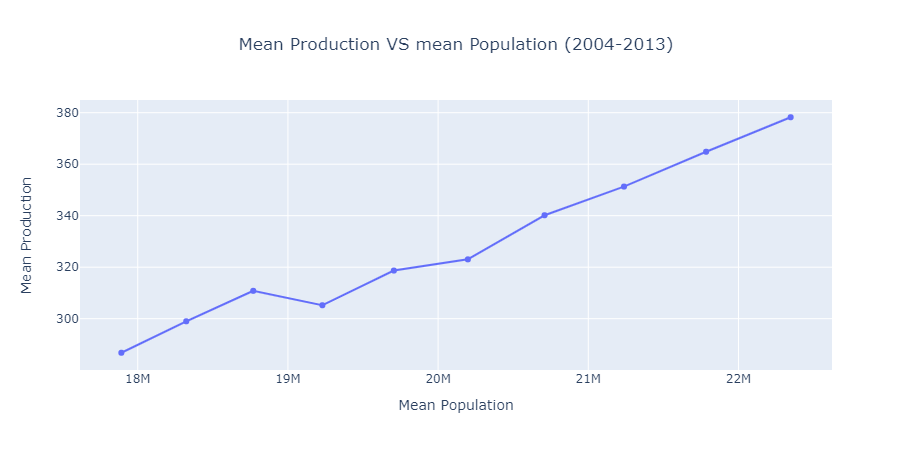

In [30]:
fig = go.Figure(data=go.Scatter(x= prod_pop_mean['Population'],  
                                y=prod_pop_mean['Value'], 
                                text= prod_pop_mean['Year']))
fig.update_layout(
    title="Mean Production VS mean Population (2004-2013)",title_x=0.5,
    xaxis_title="Mean Population",
    yaxis_title="Mean Production")
fig.show()

In [ ]:
#compute cummulative percentage change
prod_pop_mean[['Value', 'Population']].pct_change(axis=0,fill_method='bfill').cumsum()*100

**There has been a fairly linear relationship between average production and average population. Average population increased by 22.5 percent between 2004 and 2013 and average production also went up by 28.3 percent within that time frame.We should expect food production to continue to increase in the coming years. let us check the veracity of this claim with Pearson test at 5 percent acceptance level.**

In [32]:
#Compute correlation coefficient and p-value
from scipy.stats import pearsonr
data1 = prod_pop_mean['Value']
data2 = prod_pop_mean['Population']
stat, p = pearsonr(data1, data2)
print('stat=%.6f, p=%.8f' % (stat, p))
if p < 0.05:
    print('production will continue to grow')
else:
    print('production will not continue to grow.')

stat=0.985304, p=0.00000020
production will continue to grow


**From our p-value, we can conclude that production will continue to grow in the coming years.**

____________________________________________________________________________________________________________________________

**Outliers, expecially extreme outliers, skew the data towards the direction of the outliers. They also have a great influence on mean values and other statistical measures. Let us consider the trend in production without the outliers.**

In [33]:
without_outliers = total_prod_per_country[total_prod_per_country['Value']<50000]

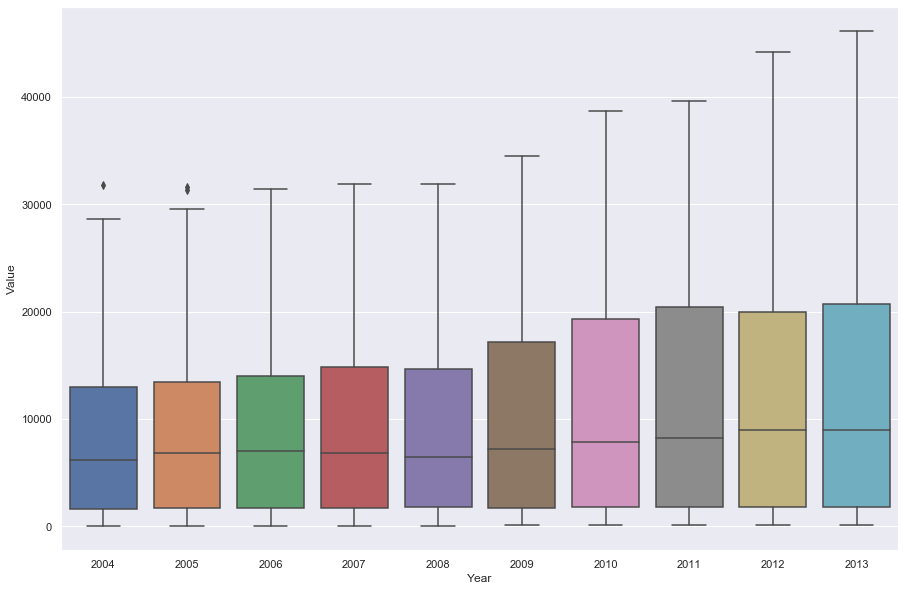

In [34]:
sns.boxplot(x='Year', y='Value', data= without_outliers)


In [35]:
#Extract production data for countries without outlier
ex_out =production_df[production_df['Country']!=('Nigeria')]
ex_out_1 = ex_out[ex_out['Country']!='South Africa']
ex_out_2 =  ex_out_1[ex_out_1['Country']!='Egypt']
#compute mean 
mean_supply_without_outliers = ex_out_2.groupby('Year')['Value'].mean().to_frame().reset_index()
mean_supply_without_outliers

Year       Value
0  2004  181.486705
1  2005  186.661443
2  2006  195.821462
3  2007  193.619658
4  2008  198.584046
5  2009  216.350902
6  2010  229.080722
7  2011  236.113960
8  2012  241.376011
9  2013  254.083294

In [ ]:
mean_supply_without_outliers['Value'].pct_change(axis=0,fill_method='bfill').cumsum()*100

**As we can see, mean values decreased when calculated without outliers. Also, average production actually increased by 34.6% for countries without outliers. Although thier performance, when compared with countries like Nigeria, Egypt and South Africa, seems low, they have been increasing their output at a slighly higher rate than the outlying three countries.**

______________________________________________________________________________________________________________________________

# EXPLORING FOOD SUPPLY DATASET

In [ ]:
supply_df.head()

In [ ]:
#merge supply and population datasets
supply_df = pd.merge(supply_df, assign_code, on='Country')
supply_df = pd.merge(supply_df, pop, on=('CODE','Year'))
supply_df.head()

In [ ]:
supply_df.info()

In [ ]:
len(supply_df['Country'].unique())

In [ ]:
supply_df.shape

### TRENDS IN FOOD SUPPLY

Text(0.5, 1.0, 'Trends in Food Supply(2004-2013)')

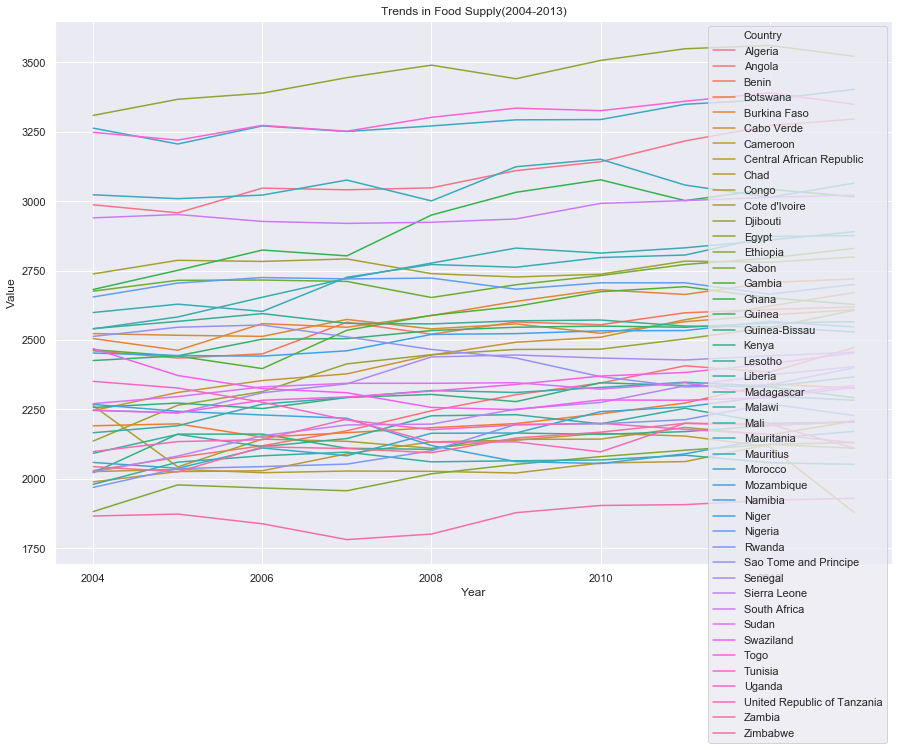

In [42]:
#Initialize line plot for total supply per country
lineplot = sns.lineplot(x='Year', y='Value',hue= 'Country', data = supply_df)
lineplot.set_title('Trends in Food Supply(2004-2013)')

**A choropleth dipiction of the above line plot is giving below.**

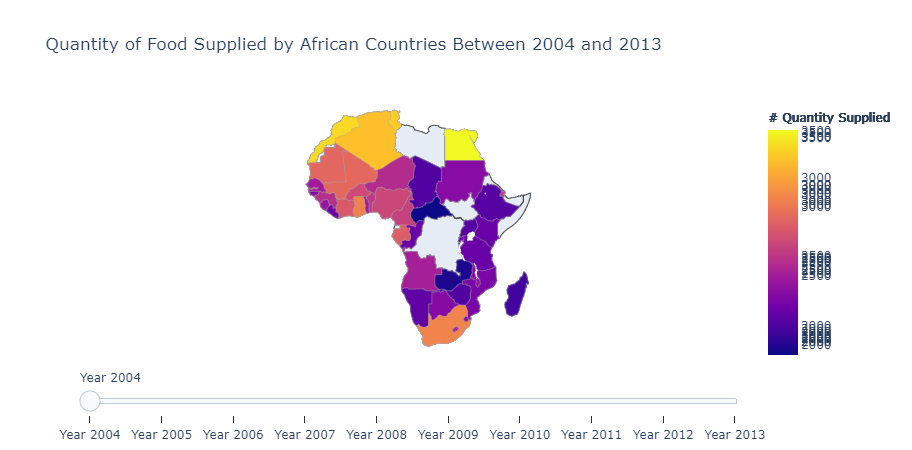

In [43]:
#Initialize choropleth map 
data_slider = []
for year in supply_df['Year'].unique():
    df_segmented =  supply_df[(supply_df['Year']== year)]

    for col in df_segmented.columns:
        df_segmented[col] = df_segmented[col]

    data_each_yr = dict(type='choropleth',
                        locations = df_segmented['CODE'],
                        z=df_segmented['Value'],
                        locationmode='ISO-3',
                        text = df_segmented['Country'],
    marker_line_color='darkgray',
    marker_line_width=0.3,
                        colorbar= {'title':'# Quantity Supplied'})

    data_slider.append(data_each_yr)

steps = []
for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label='Year {}'.format(i + 2004))
    step['args'][1][i] = True
    steps.append(step)

sliders = [dict(active=0, pad={"t": 1}, steps=steps)]

layout = dict(title ='Quantity of Food Supplied by African Countries Between 2004 and 2013'
              , geo=dict(scope='africa',
                       projection={'type': 'equirectangular'}),
              sliders=sliders)

fig = dict(data=data_slider, layout=layout)
figi = go.Figure(fig)
figi.show()


In [44]:
#compute top 20 suppliers
top_suppliers = supply_df.groupby('Country')['Value'].mean().to_frame().reset_index()
top_20_suppliers = top_suppliers.sort_values('Value', ascending= False).iloc[:20]


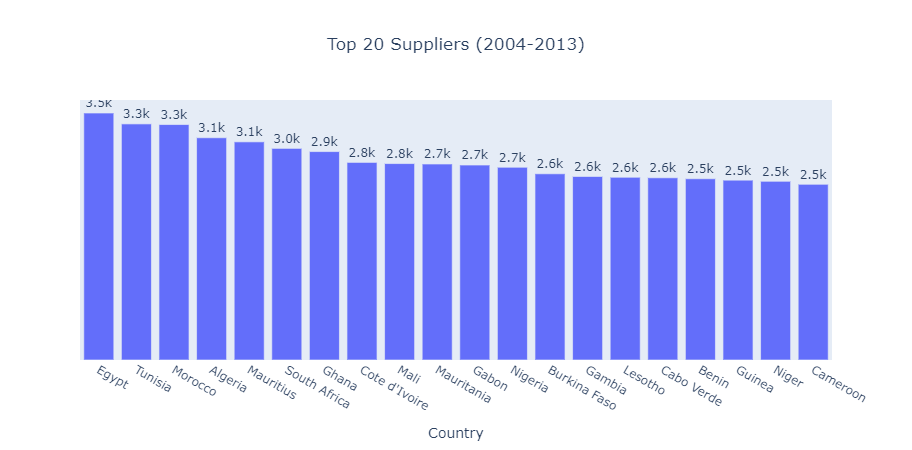

In [45]:
#Initialize bar plot for top 20 suppliers
fig = px.bar(top_20_suppliers, y='Value', x='Country',title='Top 20 Suppliers (2004-2013)',text='Value')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',title_x=0.5)
fig.update_yaxes(visible=False, showticklabels=False)

fig.show()

**Among the three heavyweight producers, Egypt is the only country that could commensurate this feat with food supply. South Africa could only rank as number 6 while Nigeria, Africa's top producer of food, is found wanting among the top ten. This is an indication that high production does not neccesarily translate to an equally high amount of food available for consumption. Tunisia, for instance, ranked 20th on the food production scale and 2nd on food supply.**

#### FOOD SUPPLY: MEDIAN, RANGES AND OUTLIERS


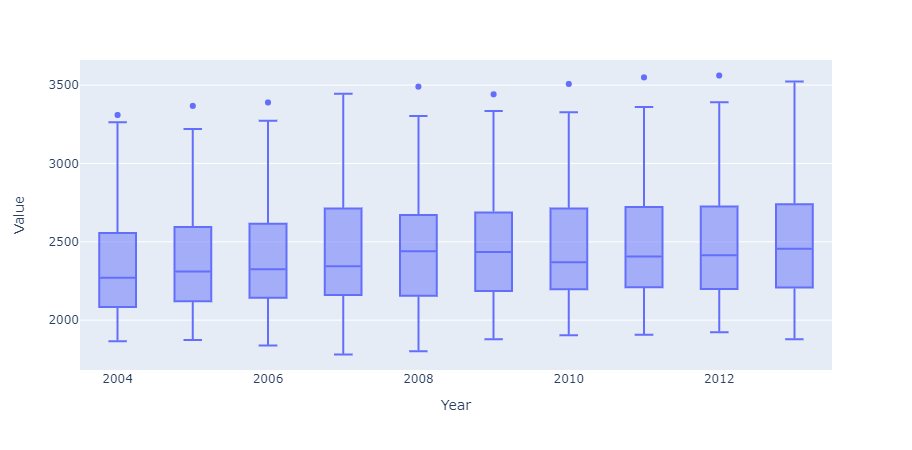

In [46]:
#Initialize supply box plot
fig = px.box(supply_df, x="Year", y="Value")
fig.show()

**Comparing the supply line plot, the map and the boxplot, we will see that the outliers originated from  Egypt. This shows that Egypt have had the highest amount of food available for consumption. As against the trend experienced in food production, there is no notable continuous increase in disparsity among the countries. This reveals that these countries levels of supply are going at a relatively similar rate.**  

**Let us take a broad view of supply disperity using the quantity of food supplied in 2012.**

In [47]:
supply_2012 = supply_df[supply_df['Year']==2012]

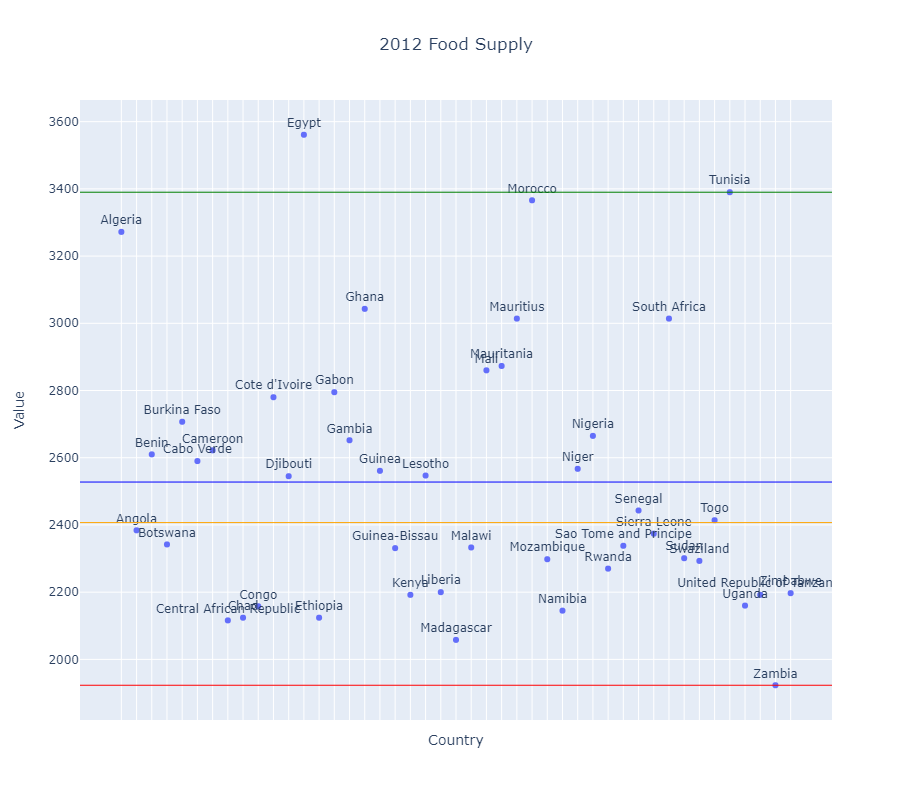

In [48]:
#Initialize scatter plot for 2012 supply data
fig = px.scatter(supply_2012, x="Country", y="Value",
                 title= '2012 Food Supply', text ='Country')

# add lower fence,median, mean and upper fence lines respectively
fig.update_layout(width=1000,
height=800, 
autosize=False,title_x= 0.5, shapes=[
    dict(type= 'line',xref= 'paper', x0= 0, x1= 1,yref= 'y', y0= 1923, y1= 1923, 
         line=dict(color="Red",width=1,)),
    dict(type= 'line', xref= 'paper', x0= 0, x1= 1, yref= 'y', y0= 2407, y1= 2407,
         line=dict(color="Orange",width=1,)),
     dict(type= 'line', xref= 'paper', x0= 0, x1= 1,yref= 'y', y0= 2527.644444, y1= 2527.644444, 
          line=dict(color="Blue", width=1)),
     dict(type= 'line',xref= 'paper', x0= 0, x1= 1,yref= 'y', y0= 3390, y1= 3390, 
          line=dict(color="Green",width=1))], showlegend= False)

fig.update_traces(textposition='top center')
fig.update_xaxes(showticklabels=False)

fig.show()

**The green, blue, yellow and red line signifies upper fence, mean, median and lowe fence respectively.**

In [ ]:
mean_supply = supply_df.groupby('Year')['Value'].mean().to_frame().reset_index()
supply_pop_mean = pd.merge(mean_supply, mean_population, on = 'Year')
supply_pop_mean

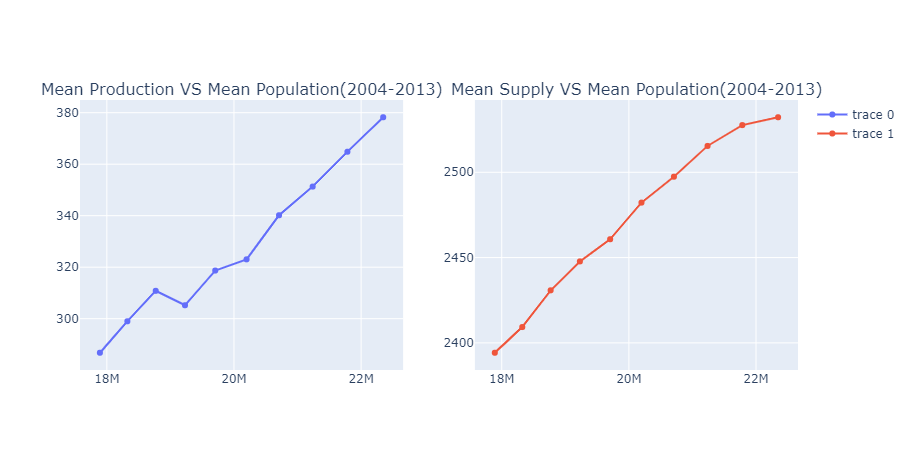

In [50]:
from plotly.subplots import make_subplots
# Initialize figure with subplots
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=("Mean Production VS Mean Population(2004-2013)", 
                                    "Mean Supply VS Mean Population(2004-2013)"))
fig.add_trace(go.Scatter(x=prod_pop_mean['Population'], y=prod_pop_mean['Value']), row=1, col=1)
fig.add_trace(go.Scatter(x=supply_pop_mean['Population'], y=supply_pop_mean['Value']), row=1, col=2)

In [ ]:
supply_pop_mean[['Value','Population']].pct_change(axis=0,fill_method='bfill').cumsum()*100

**Intrestingly, while production and population increased by over 20% between 2004 and 2013, food supply only increased by 5.6% within that period.**

______________________________________________________________________________________________________________________________

####  PRODUCTION VS SUPPLY TREND

In [ ]:
prod_supply = pd.merge(mean_supply, mean_production, on ='Year')
prod_supply= prod_supply.rename(columns={'Value_x':'Mean Production','Value_y':'Mean Supply'})
prod_supply

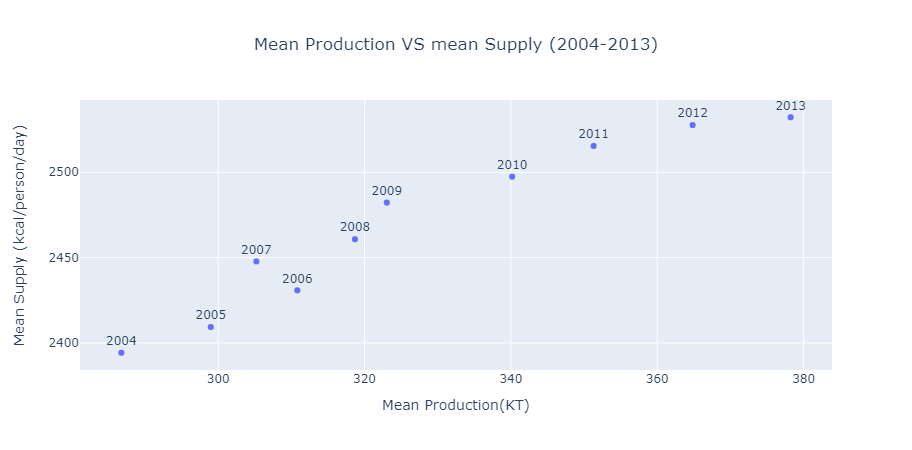

In [53]:
#Initialize scatter plot for mean production vs mean supply
fig = px.scatter(x = mean_production['Value'],y=mean_supply['Value'], 
                 text= mean_supply['Year'],title= 'Mean Production VS mean Supply (2004-2013)',
                labels={
                     "x": "Mean Production(KT)",
                     "y": "Mean Supply (kcal/person/day)"})
fig.update_traces(textposition='top center')
fig.update_layout(title_x =0.5)
fig.show() 

**Although there seems to be a linear relationship between production and supply as population increases, it should be noted that production has increased by 28% while supply has only increased by 5%. This means it is possible that production does not directly influence supply.**


**To confirm this hypothesis, let us take a look at what Pearson test says.**

In [54]:
#Compute correlation coefficient and p-value
from scipy.stats import pearsonr
data1 = mean_production['Value']
data2 = mean_supply['Value']
stat, p = pearsonr(data1, data2)
print('stat=%.6f, p=%.8f' % (stat, p))
if p > 0.05:
    print('Production does not directly influence supply')
else:
    print('Production directly influence supply')

stat=0.964003, p=0.00000703
Production directly influence supply


**The correlation coefficient (0.96) is significantly far from 0. I.e., there is a significant correlation between mean production in a year, and the mean supply of African countries for that year. Also, the p-value is significantly far from the 5% benchmark for accepting the hypothesis. Therefore, the hypothesis that production does not directly influence supply is rejected at the 5 percent level based on the pearson correlation test.** 

**Indeed, other factors ranging from adequate storage facilities, exportation of products, to cost effectiveness might not allow increase in production to have an equal increase in food supply.** **This does not mean increase in production has not in turn lead to increase in supply, albiet little.**  

_____________________________________________________________________________________________________________________________

#### RICE PRODUCTION TREND

In [ ]:
rice_data = production_df[production_df['Item']=='Rice (Milled Equivalent)']
rice_data.head()

In [ ]:
len(rice_data['Country'].unique())

In [ ]:
#Add population data to rice production data
rice_data = pd.merge(rice_data, pop, on=('CODE','Year'))
rice_data.head()

In [ ]:
len(rice_data['Country'].unique())


In [ ]:
len(rice_data)

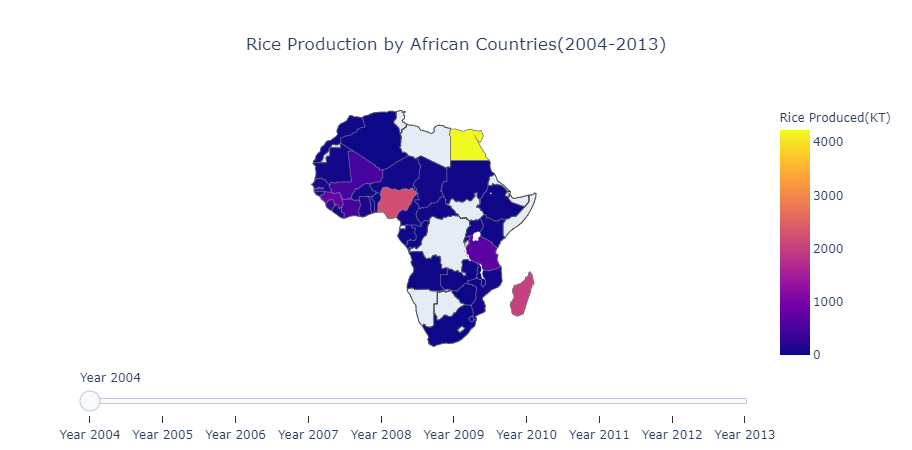

In [60]:
data_slider = []
for year in rice_data['Year'].unique():
    df_segmented =  rice_data[(rice_data['Year']== year)]

    for col in df_segmented.columns:
        df_segmented[col] = df_segmented[col]

    data_each_yr = dict(type='choropleth',
                        locations = df_segmented['CODE'],
                        z=df_segmented['Value'],
                        locationmode='ISO-3',
                        text = df_segmented['Country'],
    marker_line_color='darkgray',
    marker_line_width=0.3,
                        colorbar= {'title':'Rice Produced(KT)'})

    data_slider.append(data_each_yr)

steps = []
for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label='Year {}'.format(i + 2004))
    step['args'][1][i] = True
    steps.append(step)

sliders = [dict(active=0, pad={"t": 1}, steps=steps)]

layout = dict(title ='Rice Production by African Countries(2004-2013)'
              ,title_x=0.5, 
              geo=dict(scope='africa',
              projection={'type': 'equirectangular'}),
              sliders=sliders)

fig = dict(data=data_slider, layout=layout)
figi = go.Figure(fig)
figi.show()


In [61]:
top_rice_producers = rice_data.groupby('Country')['Value'].sum().to_frame().reset_index()
top_20_rice_producers = top_rice_producers.sort_values('Value', ascending =False).iloc[:20]

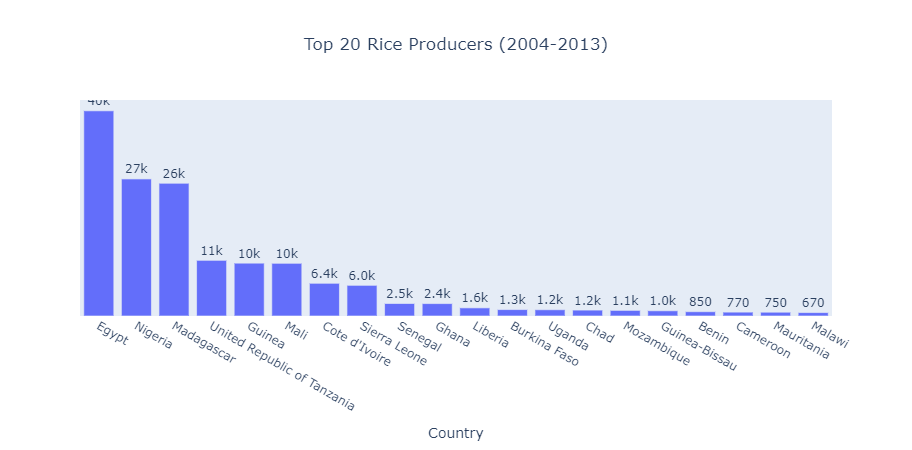

In [62]:
#Initialize bar plot
fig = px.bar(top_20_rice_producers, y='Value', x='Country',title='Top 20 Rice Producers (2004-2013)',text='Value')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',title_x=0.5)
fig.update_yaxes(visible=False, showticklabels=False)

fig.show()

In [ ]:
#compute top 3 countries percentage of the total rice production
top_3_rice_producers = top_rice_producers.sort_values('Value', ascending= False).iloc[:3]
top_3_share = ((top_3_rice_producers['Value'].sum())/(rice_data['Value'].sum()))*100
top_3_share

In [ ]:
#compute top 5 countries percentage of the total rice production
top_5_rice_producers = top_rice_producers.sort_values('Value', ascending= False).iloc[:5]
top_5_share = ((top_5_rice_producers['Value'].sum())/(rice_data['Value'].sum()))*100
top_5_share

**The top 3 countries produced 59.6% of Africa's total rice production and the top 5 countires were responsible for 73% of Africa's total rice output between 2004 and 2013.**

In [65]:
mean_rice_prod = rice_data.groupby('Year')['Value'].mean().to_frame().reset_index()
mean_rice_pop = rice_data.groupby('Year')['Population'].mean().to_frame().reset_index()
rice_pop_trend = pd.merge(mean_rice_prod, mean_rice_pop, on='Year')
rice_pop_trend.columns=(['Year','Avg Value', 'Avg Population'])

In [ ]:
rice_pop_trend

In [ ]:
rice_pop_trend[['Avg Value','Avg Population']].pct_change(axis=0,fill_method='bfill').cumsum()*100



**Rice prodction has increased by 43.3 percent between 2004 and 2013, at a rate that is almost twice the rate of population growth.**

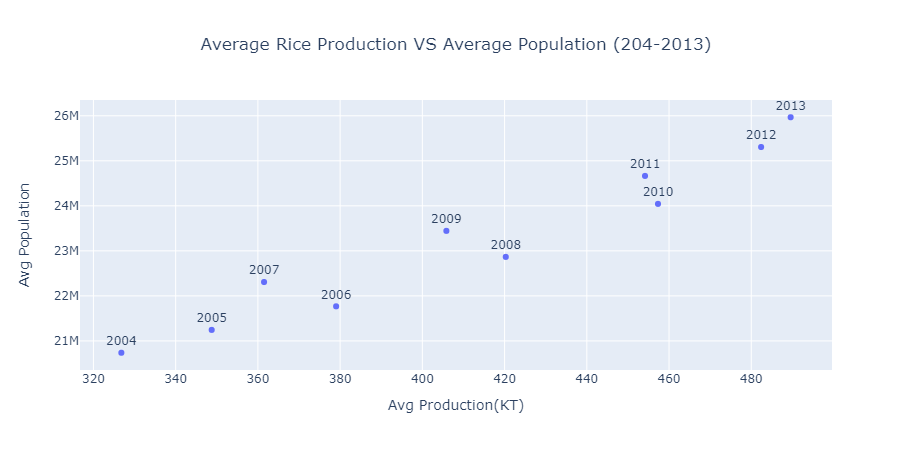

In [68]:
fig = px.scatter(x=rice_pop_trend['Avg Value'], 
                 y=rice_pop_trend['Avg Population'],
                 title='Average Rice Production VS Average Population (204-2013)',
                 text = rice_pop_trend['Year'],
                labels={"x": "Avg Production(KT)",
                     "y": "Avg Population"})
fig.update_traces(textposition='top center')
fig.update_layout(title_x =0.5)
fig.show() 

In [69]:
#Compute correlation coefficient and p-value
data1 = rice_pop_trend['Avg Value']
data2 = rice_pop_trend['Avg Population']
stat, p = pearsonr(data1, data2)
print('stat=%.6f, p=%.8f' % (stat, p))
if p > 0.05:
    print('Ho')
else:
    print('H1')

stat=0.970603, p=0.00000315
H1


____________________________________________________________________________________________________________________________

#### SOLUTION TO TEST QUESTIONS

- Least 3 Countries for food supplied between 2004 and 2006(inclusive)

In [94]:
supply = supply_df[supply_df['Year']<2007]
s=supply.groupby('Country')['Value'].sum().to_frame().reset_index().sort_values('Value', ascending= True)

In [110]:
s.head(3)

Country  Value
43                    Zambia   5577
13                  Ethiopia   5827
7   Central African Republic   6044

- Country that produced the highest amount of oats in 2010

In [111]:
oats = production_df[production_df['Item']=='Oats']
oats_2010 = oats[oats['Year']==2010]
highest_oat = oats_2010.groupby('Country')['Value'].sum().to_frame().reset_index()
highest= highest_oat.sort_values('Value', ascending= False)
highest.head(1)

Country  Value
0  Algeria     88